In [2]:
from numpy import *
from numpy.random import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from PlotFuncs import *
from LabFuncs import *
from Params import *
from HaloFuncs import *
from scipy.stats import norm
import pandas
import cmocean
from copy import copy


df = pandas.read_csv('../data/Gaia-SDSS.csv')
df_S = pandas.read_csv('../data/GAIA_SDSS_Shards.csv')
names = df_S.group_id.unique()

In [3]:
# Fit data to three component halo
means_init = zeros(shape=(3,4))
means_init[0,:] = array([0.0,0.0,0.0,-1.4]) # Sausage
means_init[1,:] = array([0.0,0.0,0.0,-2.0]) # Halo
means_init[2,:] = array([0.0,126.0,0.0,-1.8]) # Halo
weights_init = array([0.5,0.34,0.16])
covariance_type = 'full'
data = array([df.GalRVel,df.GalphiVel,df.GalzVel,df.feh]).T
clf = mixture.GaussianMixture(n_components=3, covariance_type=covariance_type,
                              weights_init=weights_init,means_init=means_init,tol=1e-12,reg_covar=1e-8,max_iter=1000)
clf.fit(data)
Ps = clf.predict_proba(data)
meens = clf.means_
covs = clf.covariances_
ws = clf.weights_
eta = ws[0]

Ps = clf.predict_proba(data)
imod = argmax(Ps,axis=1)
df1 = df.loc[imod==0]
df2 = df.loc[imod==1]
df3 = df.loc[imod==2]

print("Sausage")
print("%.2f ± %.2f" % (meens[0,0],sqrt(covs[0,0,0])))
print("%.2f ± %.2f" % (meens[0,1],sqrt(covs[0,1,1])))
print("%.2f ± %.2f" % (meens[0,2],sqrt(covs[0,2,2])))
print("%.2f ± %.2f" % (meens[0,3],sqrt(covs[0,3,3])))
print(sqrt(covs[0,:,:]*(covs[0,:,:]>.0)))

print("")
print("Halo")
print("%.2f ± %.2f" % (meens[1,0],sqrt(covs[1,0,0])))
print("%.2f ± %.2f" % (meens[1,1],sqrt(covs[1,1,1])))
print("%.2f ± %.2f" % (meens[1,2],sqrt(covs[1,2,2])))
print("%.2f ± %.2f" % (meens[1,3],sqrt(covs[1,3,3])))
print(sqrt(covs[1,:,:]*(covs[1,:,:]>.0)))

print("")
print("Disk")
print("%.2f ± %.2f" % (meens[2,0],sqrt(covs[2,0,0])))
print("%.2f ± %.2f" % (meens[2,1],sqrt(covs[2,1,1])))
print("%.2f ± %.2f" % (meens[2,2],sqrt(covs[2,2,2])))
print("%.2f ± %.2f" % (meens[2,3],sqrt(covs[2,3,3])))
print(sqrt(covs[2,:,:]*(covs[2,:,:]>.0)))


# # For copying into latex document

# sigrp1 = covs[0,0,1]/sqrt(covs[0,1,1]*covs[0,0,0])
# sigrp2 = covs[1,0,1]/sqrt(covs[1,1,1]*covs[1,0,0])
# sigrp3 = covs[2,0,1]/sqrt(covs[2,1,1]*covs[2,0,0])

# sigrz1 = covs[0,0,2]/sqrt(covs[0,2,2]*covs[0,0,0])
# sigrz2 = covs[1,0,2]/sqrt(covs[1,2,2]*covs[1,0,0])
# sigrz3 = covs[2,0,2]/sqrt(covs[2,2,2]*covs[2,0,0])

# sigpz1 = covs[0,1,2]/sqrt(covs[0,1,1]*covs[0,2,2])
# sigpz2 = covs[1,1,2]/sqrt(covs[1,1,1]*covs[1,2,2])
# sigpz3 = covs[2,1,2]/sqrt(covs[2,1,1]*covs[2,2,2])

# print(r"$\bar{v}_r[{\rm km\,s}^{-1}]$ & $%.1f \pm %.1f$ & $%.1f \pm %.1f$ & $%.1f \pm %.1f$ \\" % (meens[1,0],sqrt(covs[1,0,0]),meens[0,0],sqrt(covs[0,0,0]),meens[2,0],sqrt(covs[2,0,0])))
# print(r"$\bar{v}_\phi[{\rm km\,s}^{-1}]$ & $%.1f \pm %.1f$ & $%.1f \pm %.1f$ & $%.1f \pm %.1f$ \\" % (meens[1,1],sqrt(covs[1,1,1]),meens[0,1],sqrt(covs[0,1,1]),meens[2,1],sqrt(covs[2,1,1])))
# print(r"$\bar{v}_z[{\rm km\,s}^{-1}]$ & $%.1f \pm %.1f$ & $%.2f \pm %.1f$ & $%.1f \pm %.1f$ \\" % (meens[1,2],sqrt(covs[1,2,2]),meens[0,2],sqrt(covs[0,2,2]),meens[2,2],sqrt(covs[2,2,2])))
# print(r"$\overline{\rm [Fe/H]}$ & $%.1f \pm %.1f$ & $%.1f \pm %.1f$ & $%.1f \pm %.1f$ \\" % (meens[1,3],sqrt(covs[1,3,3]),meens[0,3],sqrt(covs[0,3,3]),meens[2,3],sqrt(covs[2,3,3])))
# print(r"$\Sigma_{r\phi}/\sigma_r\sigma_\phi$ & $%.1f$ & $%.1f$ & $%.1f$ \\"%(sigrp2,sigrp1,sigrp3))
# print(r"$\Sigma_{rz}/\sigma_r\sigma_z$ & $%.1f$ & $%.1f$ & $%.1f$ \\"%(sigrz2,sigrz1,sigrz3))
# print(r"$\Sigma_{\phi z}/\sigma_\phi\sigma_z$ & $%.1f$ & $%.1f$ & $%.1f$ \\"%(sigpz2,sigpz1,sigpz3))
# print(r"$w$ & $%.2f$ & $%.2f$ & $%.2f$ \\"%(ws[1],ws[0],ws[2]))


Sausage
-8.17 ± 158.93
25.72 ± 61.50
0.99 ± 80.86
-1.39 ± 0.23
[[158.93219681  -0.          61.64548034   0.64040059]
 [ -0.          61.50275789  -0.          -0.        ]
 [ 61.64548034  -0.          80.8637269    0.47118496]
 [  0.64040059  -0.           0.47118496   0.23117556]]

Halo
-0.06 ± 144.44
5.97 ± 120.03
8.03 ± 115.67
-1.90 ± 0.40
[[144.4425513   -0.          39.30495418   1.26824418]
 [ -0.         120.03195253  -0.          -0.        ]
 [ 39.30495418  -0.         115.66973366   1.30480998]
 [  1.26824418  -0.           1.30480998   0.39917568]]

Disk
12.37 ± 76.75
128.78 ± 50.13
3.57 ± 62.69
-1.67 ± 0.27
[[76.75068431 10.36023621 30.12016446 -0.        ]
 [10.36023621 50.12568916 -0.          1.24266779]
 [30.12016446 -0.         62.69162036  0.14148515]
 [-0.          1.24266779  0.14148515  0.27144356]]


/Users/ciaranohare/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:13: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  del sys.path[0]

/Users/ciaranohare/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.



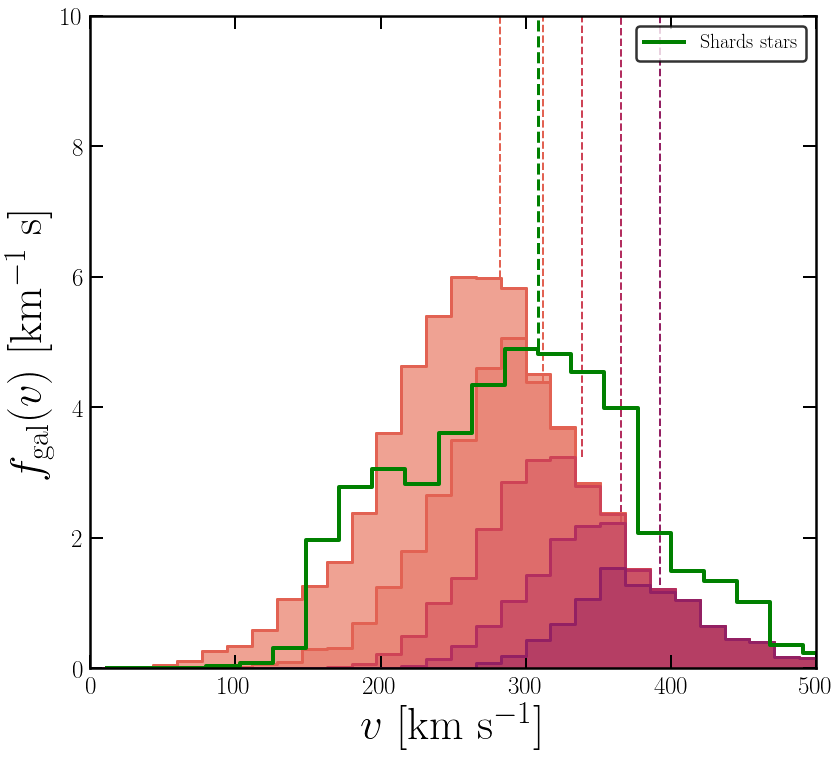

In [36]:
xlab1 = r"$v$ [km s$^{-1}$]"
ylab1 = r"$f_{\rm gal}(v)$ [km$^{-1}$ s]"
fig,ax1 = MySquarePlot(xlab1,ylab1)
ax1.set_xlim([0,500])
ax1.set_ylim(bottom=0.0,top=10.)

def speeds(dfc,v_lab=array([0.0,0.0,0.0])):
    return sqrt((dfc.GalRVel-v_lab[0])**2.0+(dfc.GalphiVel-v_lab[1])**2.0+(dfc.GalzVel-v_lab[2])**2.0)

# High energy distribution
def plotdistE(dfc,Ecut,col,alph=0.4,nbins=35,Norm=1.0):
    df_E0 = dfc.loc[(dfc['E'] > Ecut)]
    h_E0,vbins = histogram(speeds(df_E0),bins=nbins,normed=True,range=(0,600))
    vc = (vbins[1:]+vbins[0:-1])/2
    h_E0 *= Norm
    ax1.fill_between(vc,1e3*h_E0,y2=0,color=col,lw=None,alpha=alph,step='pre',zorder=0)
    ax1.step(vc,1e3*h_E0,'-',color=col,lw=3)

    mean0 = mean(speeds(df_E0))
    hmean0 = 1e3*h_E0[argmin(abs(vc-mean0))]
    ax1.plot([mean0,mean0],[hmean0,10.0],'--',color=col,lw=2,zorder=-10)
    return dfc

col_ex = (cmocean.cm.matter(linspace(0,1,11)))
df_E0 = plotdistE(df2,-1.5e5,col_ex[3,:],Norm=1)
n0 = sum(df2.E>-1.5e5)
df_E1 = plotdistE(df2,-1.5e5,col_ex[4,:],Norm=sum(df2.E>-1.5e5)/(1.0*n0))
df_E1 = plotdistE(df2,-1.4e5,col_ex[4,:],Norm=sum(df2.E>-1.4e5)/(1.0*n0))
df_E1 = plotdistE(df2,-1.3e5,col_ex[5,:],Norm=sum(df2.E>-1.3e5)/(1.0*n0))
df_E1 = plotdistE(df2,-1.2e5,col_ex[6,:],Norm=sum(df2.E>-1.2e5)/(1.0*n0))
df_E1 = plotdistE(df2,-1.1e5,col_ex[7,:],Norm=sum(df2.E>-1.1e5)/(1.0*n0))


# Shards
vv = sqrt(df_S.GalRVel**2.0+df_S.GalTVel**2.0+df_S.GalzVel**2.0)
h_shards,vbins = histogram(vv,bins=35,normed=True,range=(0,800))
vc = (vbins[1:]+vbins[0:-1])/2
ax1.step(vc,1e3*h_shards,'-',color='g',lw=4,label='Shards stars')
mean_shards = mean(vv)
hmean_shards = 1e3*h_shards[argmin(abs(vc-mean_shards))]
ax1.plot([mean_shards,mean_shards],[hmean_shards,10.0],'--',color='g',lw=3)


# Legend lines
leg = ax1.legend(loc='upper right',fontsize=20,edgecolor='k')
leg.get_frame().set_linewidth(2.5)


# Save
plt.show()
pltname = 'fv1_halo_shards'
fig.savefig('../plots/'+pltname+'.pdf',bbox_inches='tight')
fig.savefig('../plots/plots_png/'+pltname+'.png',bbox_inches='tight')     

/Users/ciaranohare/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:28: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.

/Users/ciaranohare/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:40: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.

/Users/ciaranohare/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:52: VisibleDeprecationWarning: Passing `normed=True` on non-

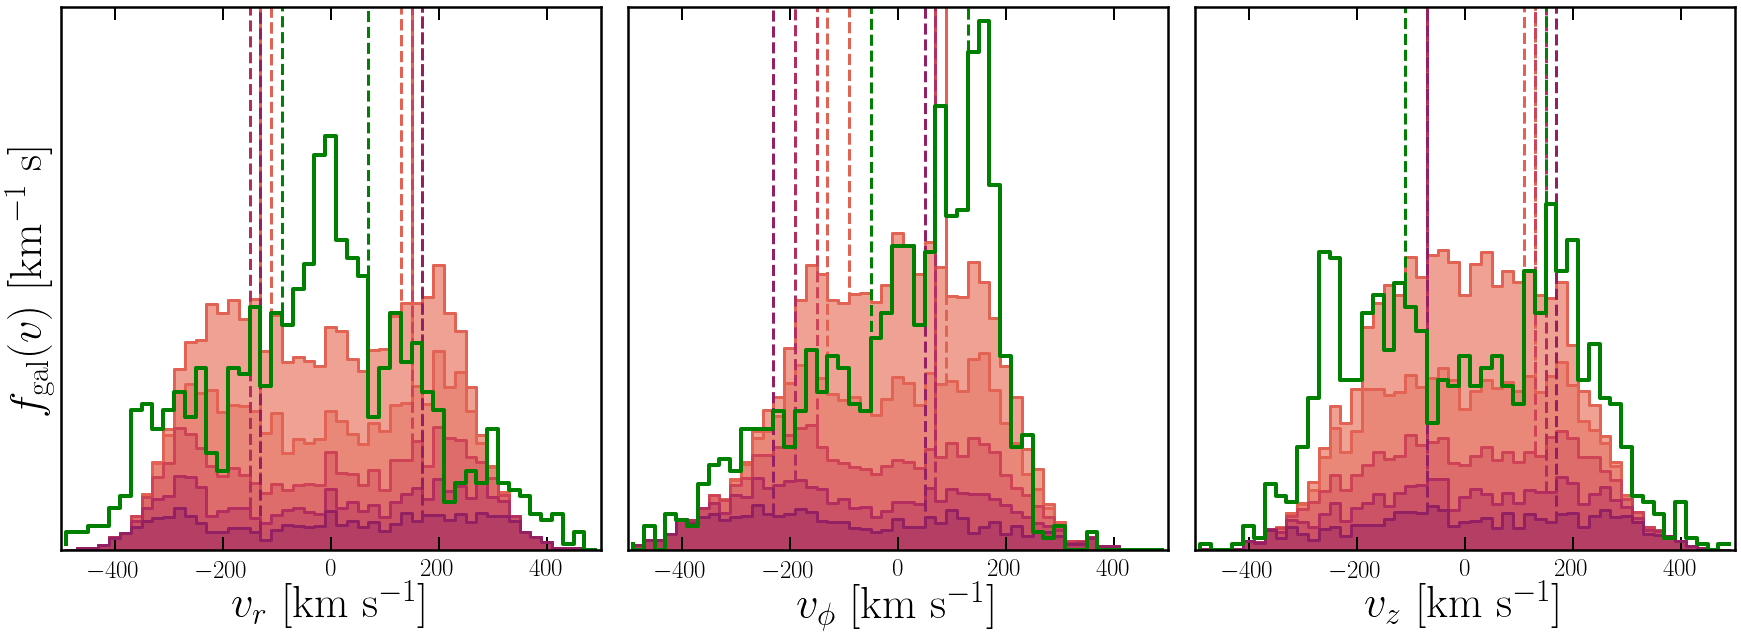

In [62]:
vlab1 = r"$v_r$ [km s$^{-1}$]"
vlab2 = r"$v_\phi$ [km s$^{-1}$]"
vlab3 = r"$v_z$ [km s$^{-1}$]"
ylab1 = r"$f_{\rm gal}(v_i)$ [km$^{-1}$ s]"
fig,ax1,ax2,ax3 = MyTriplePlot(vlab1,ylab1,vlab2,'',vlab3,'',wspace=0.05,size_y=10,size_x=30)
ymax = 4.0
vmax = 500.0
ax1.set_xlim([-vmax,vmax])
ax1.set_ylim(bottom=0.0,top=ymax)
ax2.set_xlim([-vmax,vmax])
ax2.set_ylim(bottom=0.0,top=ymax)
ax3.set_xlim([-vmax,vmax])
ax3.set_ylim(bottom=0.0,top=ymax)
ax1.set_yticks([])
ax2.set_yticks([])
ax3.set_yticks([])

def speeds(dfc,v_lab=array([0.0,0.0,0.0])):
    vr = (dfc.GalRVel-v_lab[0])
    vphi = (dfc.GalphiVel-v_lab[1])
    vz = (dfc.GalzVel-v_lab[2])
    return vr,vphi,vz

# High energy distribution
def plotdistE(dfc,Ecut,col,alph=0.4,nbins=50,Norm=1.0):
    df_E0 = dfc.loc[(dfc['E'] > Ecut)]
    vr,vphi,vz = speeds(df_E0)
    h_E0,vbins = histogram(vr,bins=nbins,normed=True,range=(-vmax,vmax))
    vc = (vbins[1:]+vbins[0:-1])/2
    h_E0 *= Norm
    ax1.fill_between(vc,1e3*h_E0,y2=0,color=col,lw=None,alpha=alph,step='pre',zorder=0)
    ax1.step(vc,1e3*h_E0,'-',color=col,lw=3)
    m1 = sort(vr)[round(0.32*size(vr))]
    m2 = sort(vr)[round(0.68*size(vr))]
    hm1 = 1e3*h_E0[argmin(abs(vc-m1))]
    hm2 = 1e3*h_E0[argmin(abs(vc-m2))]
    ax1.plot([vc[argmin(abs(vc-m1))],vc[argmin(abs(vc-m1))]],[hm1,10.0],'--',color=col,lw=3)
    ax1.plot([vc[argmin(abs(vc-m2))],vc[argmin(abs(vc-m2))]],[hm2,10.0],'--',color=col,lw=3)

    h_E0,vbins = histogram(vphi,bins=nbins,normed=True,range=(-vmax,vmax))
    vc = (vbins[1:]+vbins[0:-1])/2
    h_E0 *= Norm
    ax2.fill_between(vc,1e3*h_E0,y2=0,color=col,lw=None,alpha=alph,step='pre',zorder=0)
    ax2.step(vc,1e3*h_E0,'-',color=col,lw=3)
    m1 = sort(vphi)[round(0.32*size(vphi))]
    m2 = sort(vphi)[round(0.68*size(vphi))]
    hm1 = 1e3*h_E0[argmin(abs(vc-m1))]
    hm2 = 1e3*h_E0[argmin(abs(vc-m2))]
    ax2.plot([vc[argmin(abs(vc-m1))],vc[argmin(abs(vc-m1))]],[hm1,10.0],'--',color=col,lw=3)
    ax2.plot([vc[argmin(abs(vc-m2))],vc[argmin(abs(vc-m2))]],[hm2,10.0],'--',color=col,lw=3)

    h_E0,vbins = histogram(vz,bins=nbins,normed=True,range=(-vmax,vmax))
    vc = (vbins[1:]+vbins[0:-1])/2
    h_E0 *= Norm
    ax3.fill_between(vc,1e3*h_E0,y2=0,color=col,lw=None,alpha=alph,step='pre',zorder=0)
    ax3.step(vc,1e3*h_E0,'-',color=col,lw=3)
    m1 = sort(vz)[round(0.32*size(vz))]
    m2 = sort(vz)[round(0.68*size(vz))]
    hm1 = 1e3*h_E0[argmin(abs(vc-m1))]
    hm2 = 1e3*h_E0[argmin(abs(vc-m2))]
    ax3.plot([vc[argmin(abs(vc-m1))],vc[argmin(abs(vc-m1))]],[hm1,10.0],'--',color=col,lw=3)
    ax3.plot([vc[argmin(abs(vc-m2))],vc[argmin(abs(vc-m2))]],[hm2,10.0],'--',color=col,lw=3)

    return dfc

col_ex = (cmocean.cm.matter(linspace(0,1,11)))
df_E0 = plotdistE(df2,-1.5e5,col_ex[3,:],Norm=1)
n0 = sum(df2.E>-1.5e5)
df_E1 = plotdistE(df2,-1.5e5,col_ex[4,:],Norm=sum(df2.E>-1.5e5)/(1.0*n0))
df_E1 = plotdistE(df2,-1.4e5,col_ex[4,:],Norm=sum(df2.E>-1.4e5)/(1.0*n0))
df_E1 = plotdistE(df2,-1.3e5,col_ex[5,:],Norm=sum(df2.E>-1.3e5)/(1.0*n0))
df_E1 = plotdistE(df2,-1.2e5,col_ex[6,:],Norm=sum(df2.E>-1.2e5)/(1.0*n0))
df_E1 = plotdistE(df2,-1.1e5,col_ex[7,:],Norm=sum(df2.E>-1.1e5)/(1.0*n0))
# df_E0 = plotdistE(df2,-1.1e5,col_ex[3,:],Norm=1)
# df_E1 = plotdistE(df2,-1.2e5,col_ex[4,:],Norm=1)
# df_E1 = plotdistE(df2,-1.3e5,col_ex[4,:],Norm=1)
# df_E1 = plotdistE(df2,-1.4e5,col_ex[5,:],Norm=1)
# df_E1 = plotdistE(df2,-1.5e5,col_ex[6,:],Norm=1)
# df_E1 = plotdistE(df2,-1.6e5,col_ex[7,:],Norm=1)

# Shards
nbins = 50
vr = df_S.GalRVel
vphi = df_S.GalTVel
vz = df_S.GalzVel
h_shards,vbins = histogram(vr,bins=nbins,normed=True,range=(-vmax,vmax))
vc = (vbins[1:]+vbins[0:-1])/2
ax1.step(vc,1e3*h_shards,'-',color='g',lw=4)
m1 = sort(vr)[round(0.32*size(vr))]
m2 = sort(vr)[round(0.68*size(vr))]
hm1 = 1e3*h_shards[argmin(abs(vc-m1))]
hm2 = 1e3*h_shards[argmin(abs(vc-m2))]
ax1.plot([vc[argmin(abs(vc-m1))],vc[argmin(abs(vc-m1))]],[hm1,10.0],'--',color='g',lw=3)
ax1.plot([vc[argmin(abs(vc-m2))],vc[argmin(abs(vc-m2))]],[hm2,10.0],'--',color='g',lw=3)

h_shards,vbins = histogram(vphi,bins=nbins,normed=True,range=(-vmax,vmax))
vc = (vbins[1:]+vbins[0:-1])/2
ax2.step(vc,1e3*h_shards,'-',color='g',lw=4)
m1 = sort(vphi)[round(0.32*size(vphi))]
m2 = sort(vphi)[round(0.68*size(vphi))]
hm1 = 1e3*h_shards[argmin(abs(vc-m1))]
hm2 = 1e3*h_shards[argmin(abs(vc-m2))]
ax2.plot([vc[argmin(abs(vc-m1))],vc[argmin(abs(vc-m1))]],[hm1,10.0],'--',color='g',lw=3)
ax2.plot([vc[argmin(abs(vc-m2))],vc[argmin(abs(vc-m2))]],[hm2,10.0],'--',color='g',lw=3)

h_shards,vbins = histogram(vz,bins=nbins,normed=True,range=(-vmax,vmax))
vc = (vbins[1:]+vbins[0:-1])/2
ax3.step(vc,1e3*h_shards,'-',color='g',lw=4)
m1 = sort(vz)[round(0.32*size(vz))]
m2 = sort(vz)[round(0.68*size(vz))]
hm1 = 1e3*h_shards[argmin(abs(vc-m1))]
hm2 = 1e3*h_shards[argmin(abs(vc-m2))]
ax3.plot([vc[argmin(abs(vc-m1))],vc[argmin(abs(vc-m1))]],[hm1,10.0],'--',color='g',lw=3)
ax3.plot([vc[argmin(abs(vc-m2))],vc[argmin(abs(vc-m2))]],[hm2,10.0],'--',color='g',lw=3)



# Save
plt.show()
pltname = 'fv3_halo_shards'
fig.savefig('../plots/'+pltname+'.pdf',bbox_inches='tight')
fig.savefig('../plots/plots_png/'+pltname+'.png',bbox_inches='tight')     

/Users/ciaranohare/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:24: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.

/Users/ciaranohare/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:36: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.

/Users/ciaranohare/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:48: VisibleDeprecationWarning: Passing `normed=True` on non-

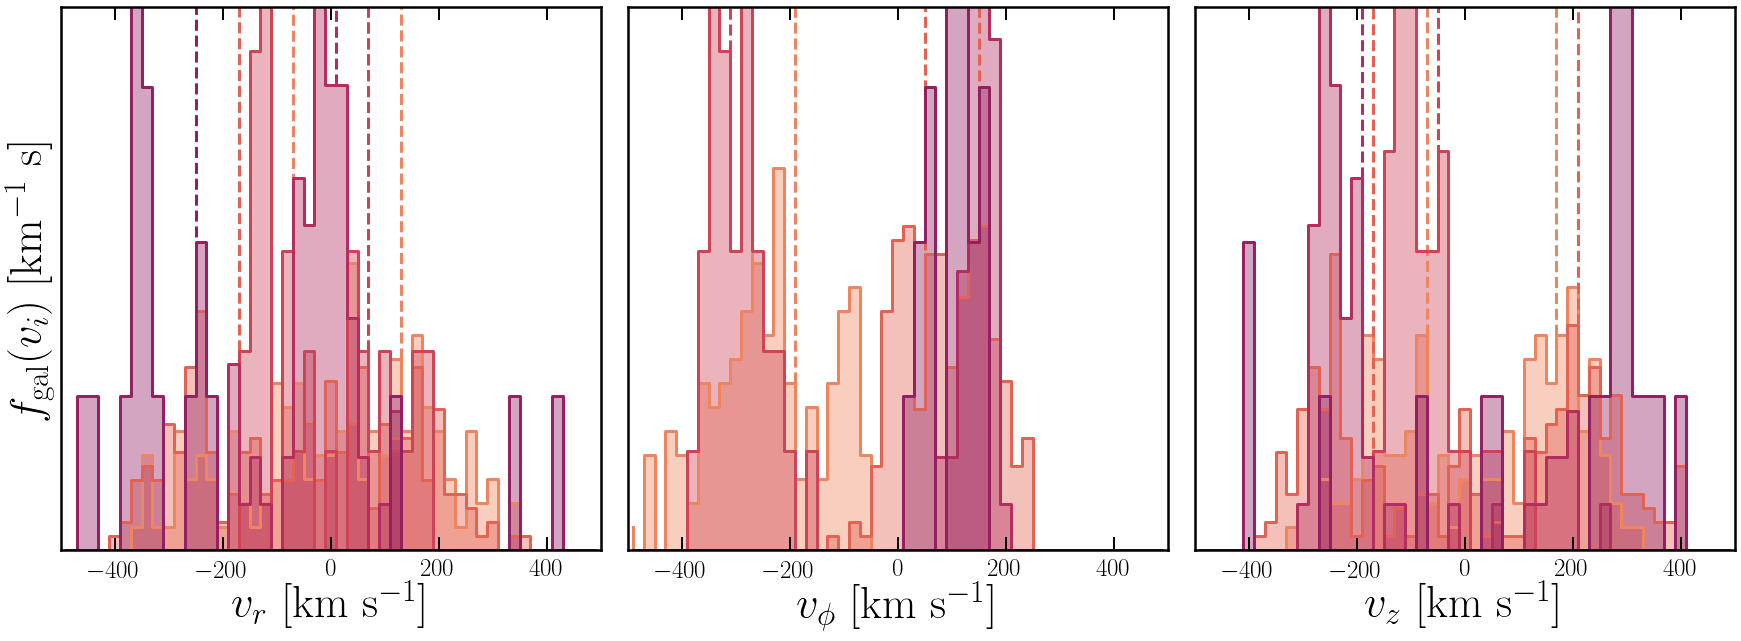

In [75]:
vlab1 = r"$v_r$ [km s$^{-1}$]"
vlab2 = r"$v_\phi$ [km s$^{-1}$]"
vlab3 = r"$v_z$ [km s$^{-1}$]"
ylab1 = r"$f_{\rm gal}(v_i)$ [km$^{-1}$ s]"
fig,ax1,ax2,ax3 = MyTriplePlot(vlab1,ylab1,vlab2,'',vlab3,'',wspace=0.05,size_y=10,size_x=30)
ymax = 8.0
vmax = 500.0
ax1.set_xlim([-vmax,vmax])
ax1.set_ylim(bottom=0.0,top=ymax)
ax2.set_xlim([-vmax,vmax])
ax2.set_ylim(bottom=0.0,top=ymax)
ax3.set_xlim([-vmax,vmax])
ax3.set_ylim(bottom=0.0,top=ymax)
ax1.set_yticks([])
ax2.set_yticks([])
ax3.set_yticks([])


def plotshards3(Examples,col,alph=0.4,nbins=50,Norm=1.0):
    dfc = df_S[df_S.group_id.isin(Examples)]    
    vr = dfc.GalRVel
    vphi = dfc.GalTVel
    vz = dfc.GalzVel
    h,vbins = histogram(vr,bins=nbins,normed=True,range=(-vmax,vmax))
    vc = (vbins[1:]+vbins[0:-1])/2
    h *= Norm
    ax1.fill_between(vc,1e3*h,y2=0,color=col,lw=None,alpha=alph,step='pre',zorder=0)
    ax1.step(vc,1e3*h,'-',color=col,lw=3)
    m1 = sort(vr)[round(0.32*size(vr))]
    m2 = sort(vr)[round(0.68*size(vr))]
    hm1 = 1e3*h[argmin(abs(vc-m1))]
    hm2 = 1e3*h[argmin(abs(vc-m2))]
    ax1.plot([vc[argmin(abs(vc-m1))],vc[argmin(abs(vc-m1))]],[hm1,10.0],'--',color=col,lw=3)
    ax1.plot([vc[argmin(abs(vc-m2))],vc[argmin(abs(vc-m2))]],[hm2,10.0],'--',color=col,lw=3)

    h,vbins = histogram(vphi,bins=nbins,normed=True,range=(-vmax,vmax))
    vc = (vbins[1:]+vbins[0:-1])/2
    h *= Norm
    ax2.fill_between(vc,1e3*h,y2=0,color=col,lw=None,alpha=alph,step='pre',zorder=0)
    ax2.step(vc,1e3*h,'-',color=col,lw=3)
    m1 = sort(vphi)[round(0.32*size(vphi))]
    m2 = sort(vphi)[round(0.68*size(vphi))]
    hm1 = 1e3*h[argmin(abs(vc-m1))]
    hm2 = 1e3*h[argmin(abs(vc-m2))]
    ax2.plot([vc[argmin(abs(vc-m1))],vc[argmin(abs(vc-m1))]],[hm1,10.0],'--',color=col,lw=3)
    ax2.plot([vc[argmin(abs(vc-m2))],vc[argmin(abs(vc-m2))]],[hm2,10.0],'--',color=col,lw=3)

    h,vbins = histogram(vz,bins=nbins,normed=True,range=(-vmax,vmax))
    vc = (vbins[1:]+vbins[0:-1])/2
    h *= Norm
    ax3.fill_between(vc,1e3*h,y2=0,color=col,lw=None,alpha=alph,step='pre',zorder=0)
    ax3.step(vc,1e3*h,'-',color=col,lw=3)
    m1 = sort(vz)[round(0.32*size(vz))]
    m2 = sort(vz)[round(0.68*size(vz))]
    hm1 = 1e3*h[argmin(abs(vc-m1))]
    hm2 = 1e3*h[argmin(abs(vc-m2))]
    ax3.plot([vc[argmin(abs(vc-m1))],vc[argmin(abs(vc-m1))]],[hm1,10.0],'--',color=col,lw=3)
    ax3.plot([vc[argmin(abs(vc-m2))],vc[argmin(abs(vc-m2))]],[hm2,10.0],'--',color=col,lw=3)

col_ex = (cmocean.cm.matter(linspace(0,1,11)))



Examples = array(['Rg1','Rg2','Rg3','Rg4','Rg5','Rg6','Rg7'])
plotshards3(Examples,col=col_ex[3,:])

Examples = array(['Cand8','Cand9','Cand10','Cand11','Cand12','Cand13'])
plotshards3(Examples,col=col_ex[4,:])


Examples = array(['S1'])
plotshards3(Examples,col=col_ex[5,:])


Examples = array(['S2'])
plotshards3(Examples,col=col_ex[6,:])


Examples = array(['C2'])
plotshards3(Examples,col=col_ex[7,:])

plt.show()

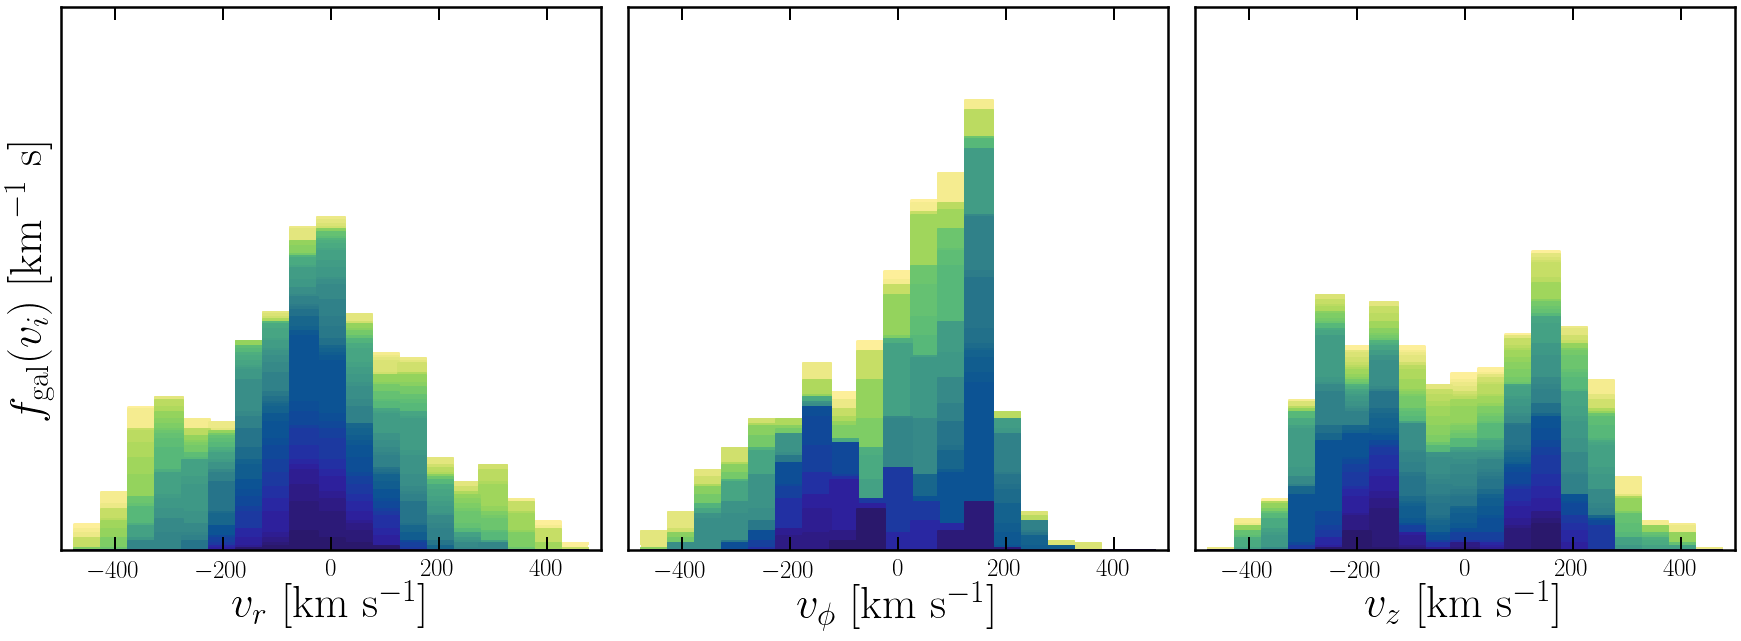

In [136]:
vlab1 = r"$v_r$ [km s$^{-1}$]"
vlab2 = r"$v_\phi$ [km s$^{-1}$]"
vlab3 = r"$v_z$ [km s$^{-1}$]"
ylab1 = r"$f_{\rm gal}(v_i)$ [km$^{-1}$ s]"
fig,ax1,ax2,ax3 = MyTriplePlot(vlab1,ylab1,vlab2,'',vlab3,'',wspace=0.05,size_y=10,size_x=30)
ymax = 10.0
vmax = 500.0
ax1.set_xlim([-vmax,vmax])
ax1.set_ylim(bottom=0.0,top=ymax)
ax2.set_xlim([-vmax,vmax])
ax2.set_ylim(bottom=0.0,top=ymax)
ax3.set_xlim([-vmax,vmax])
ax3.set_ylim(bottom=0.0,top=ymax)
ax1.set_yticks([])
ax2.set_yticks([])
ax3.set_yticks([])

ntot = shape(df_S)[0]
alph = 1.0
nbins = 20

names = df_S.group_id.unique()
ncands = size(names)
col_ex = (cmocean.cm.haline(linspace(0,1,ncands)))

s_mean = zeros(shape=ncands)
for i in range(0,ncands):
    dfc = df_S[df_S.group_id==names[i]]
    Cand_matched = df.loc[around(df.ra,8).isin(dfc.ra)]
    s_mean[i] = mean(Cand_matched.E)
names_sorted = names[argsort(s_mean)]

Examples = array([])
zorder = 1
for i in range(0,ncands):
    col = col_ex[i,:]
    Examples = append(Examples,names_sorted[i])
    dfc = df_S[df_S.group_id.isin(Examples)]    
    vr = dfc.GalRVel
    vphi = dfc.GalTVel
    vz = dfc.GalzVel
    h,vbins = histogram(vr,bins=nbins,range=(-vmax,vmax))
    vc = (vbins[1:]+vbins[0:-1])/2
    h = h/(1.0*ntot*nbins)
    ax1.fill_between(vc,1e3*h,y2=0,color=col,lw=None,alpha=alph,step='pre',zorder=zorder)
    ax1.step(vc,1e3*h,'-',color=col,lw=3,zorder=zorder)
    
    h,vbins = histogram(vphi,bins=nbins,range=(-vmax,vmax))
    vc = (vbins[1:]+vbins[0:-1])/2
    h = h/(1.0*ntot*nbins)
    ax2.fill_between(vc,1e3*h,y2=0,color=col,lw=None,alpha=alph,step='pre',zorder=zorder)
    ax2.step(vc,1e3*h,'-',color=col,lw=3,zorder=zorder)
    
    h,vbins = histogram(vz,bins=nbins,range=(-vmax,vmax))
    vc = (vbins[1:]+vbins[0:-1])/2
    h = h/(1.0*ntot*nbins)
    ax3.fill_between(vc,1e3*h,y2=0,color=col,lw=None,alpha=alph,step='pre',zorder=zorder)
    ax3.step(vc,1e3*h,'-',color=col,lw=3,zorder=zorder)
    zorder-=1


plt.show()

In [111]:
Jphi_mean = zeros(shape=ncands)
for i in range(0,ncands):
    dfc = df_S[df_S.group_id==names[i]]
    Jphi_mean[i] = mean(dfc.Jphi)
names_sorted_phi = names[argsort(Jphi_mean)]

array(['Rg1', 'Rg4', 'NCand29', 'S1', 'NCand15', 'Rg3', 'Rg2', 'Rg6',
       'NCand4', 'NCand11', 'Rg7', 'NCand19', 'NCand22', 'NCand20',
       'NCand27', 'NCand21', 'NCand7', 'Rg5', 'NCand18', 'NCand23',
       'NCand6', 'NCand1', 'Cand13', 'Cand18', 'NCand16', 'Cand10',
       'NCand28', 'NCand10', 'NCand9', 'Cand17', 'NCand0', 'Cand11',
       'NCand3', 'Cand12', 'NCand12', 'Cand16', 'C2', 'NCand2', 'S2',
       'NCand13', 'Cand9', 'Cand14', 'NCand26', 'Cand15', 'Cand8',
       'NCand25', 'NCand14', 'NCand5', 'NCand24', 'NCand17', 'NCand8'],
      dtype=object)